In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
from db import helper as db_helper
from db.models import SpotRate
import pandas as pd

In [293]:
session = db_helper.start_session()

df = pd.read_sql_table('spot_rates', session.bind)

2018-12-28 13:19:56,532 INFO sqlalchemy.engine.base.Engine select version()
2018-12-28 13:19:56,534 INFO sqlalchemy.engine.base.Engine {}
2018-12-28 13:19:56,543 INFO sqlalchemy.engine.base.Engine select current_schema()
2018-12-28 13:19:56,544 INFO sqlalchemy.engine.base.Engine {}
2018-12-28 13:19:56,553 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2018-12-28 13:19:56,554 INFO sqlalchemy.engine.base.Engine {}
2018-12-28 13:19:56,557 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2018-12-28 13:19:56,558 INFO sqlalchemy.engine.base.Engine {}
2018-12-28 13:19:56,560 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2018-12-28 13:19:56,561 INFO sqlalchemy.engine.base.Engine {}
2018-12-28 13:19:56,565 INFO sqlalchemy.engine.base.Engine SELECT c.relname FROM pg_class c JOIN pg_namespace n ON n.oid = c.relnamespace WHERE n.nspname = %(schema)s AND c.relkind = 'r'
2018-12-28 13:

2018-12-28 13:19:56,679 INFO sqlalchemy.engine.base.Engine {}


In [295]:
# Quick snapshot of the data
df.describe()

# lack of significant data in the 52wk columns
df.drop(columns=['id', 'url', 'target_52wk_high', 'target_52wk_low', 'created_at', 'updated_at'], inplace=True)

,day,month,year,base_value,target_spot_rate
count,289056.000000,289056.000000,289056.000000,289056.0,289056.000000
mean,15.668158,6.569263,2009.311369,1.0,77.180395
std,8.705023,3.438268,5.233624,0.0,278.083068
min,1.000000,1.000000,2000.000000,1.0,0.000000
25%,8.000000,4.000000,2005.000000,1.0,1.973000
50%,16.000000,7.000000,2009.000000,1.0,6.719200
75%,23.000000,10.000000,2014.000000,1.0,30.427500
max,31.000000,12.000000,2018.000000,1.0,3392.440900


In [351]:
# create Date
import datetime
df['date'] = df.apply(lambda x: datetime.date(x['year'], x['month'], x['day']), axis=1)
df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.week
df = df[['date','day','month','week','year','base_currency','target_currency','target_currency_symbol','base_value','target_spot_rate']]

# df.drop(columns=['day', 'month', 'year'], inplace=True)

df.head()

,date,day,month,week,year,base_currency,target_currency,target_currency_symbol,base_value,target_spot_rate
0,2016-08-12,12,8,32,2016,GBP,Japanese Yen,JPY,1.0,130.5530
1,2016-08-12,12,8,32,2016,GBP,Malaysian ringgit,MYR,1.0,5.2109
2,2016-08-12,12,8,32,2016,GBP,New Zealand Dollar,NZD,1.0,1.7886
3,2016-08-12,12,8,32,2016,GBP,Norwegian Krone,NOK,1.0,10.6189
4,2016-08-12,12,8,32,2016,GBP,Polish Zloty,PLN,1.0,4.9372


In [352]:
# Convert target_curency into Iso Symbol
currency_dict = {'Japanese Yen': 'JPY','Malaysian ringgit': 'MYR','New Zealand Dollar': 'NZD','Norwegian Krone': 'NOK','Polish Zloty': 'PLN','Russian Ruble': 'RUB','Saudi Riyal': 'SAR','Singapore Dollar': 'SGD','South African Rand': 'ZAR','South Korean Won': 'KRW','Swedish Krona': 'SEK','Swiss Franc': 'CHF','Taiwan Dollar': 'TWD','Thai Baht': 'THB','Turkish Lira': 'TRY','US Dollar': 'USD','Australian Dollar': 'AUD','Canadian Dollar': 'CAD','Chinese Yuan': 'Yuan','Cyprus Pound': 'CYP','Czech Koruna': 'CZK','Danish Krone': 'DKK','Estonian Kroon': 'EEK','Euro': 'EUR','Hong Kong Dollar': 'HKD','Hungarian Forint': 'HUF','Indian Rupee': 'INR','Israeli Shekel': 'ILS','Latvian Lats': 'LVL','Lithuanian Litas': 'LTL','Maltese Lira': 'MTL','Slovak Koruna': 'SKK','Slovenian Tolar': 'SIT','Sterling': 'GBP','Swedish Krona ': 'SEK','Brazilian Real': 'BRL','Austrian Schilling': 'ATS','Belgian Franc': 'BEF','Deutschemark': 'DEM','Finnish Markka': 'FIM','French Franc': 'FRF','Greek Drachma': 'GRD','Irish Punt': 'IEP','Italian Lire': 'ITL','Netherlands Guilder': 'NLG','Portuguese Escudo': 'PTE','Spanish Peseta': 'ESP'}

df['target_currency'].replace('Latvian Lats\r\nCurrency joined the Euro on 01/01/2014', 'Latvian Lats', inplace=True)
df['target_currency_symbol'] = df['target_currency'].apply(lambda x: currency_dict[x])
df[df['target_currency_symbol'].isnull()]
df.head()

,date,day,month,week,year,base_currency,target_currency,target_currency_symbol,base_value,target_spot_rate
0,2016-08-12,12,8,32,2016,GBP,Japanese Yen,JPY,1.0,130.5530
1,2016-08-12,12,8,32,2016,GBP,Malaysian ringgit,MYR,1.0,5.2109
2,2016-08-12,12,8,32,2016,GBP,New Zealand Dollar,NZD,1.0,1.7886
3,2016-08-12,12,8,32,2016,GBP,Norwegian Krone,NOK,1.0,10.6189
4,2016-08-12,12,8,32,2016,GBP,Polish Zloty,PLN,1.0,4.9372


In [377]:
# Split DF by currency
gbp_df = df[(df['base_currency']=='GBP')]
usd_df = df[(df['base_currency']=='USD')]
eur_df = df[(df['base_currency']=='EUR')]

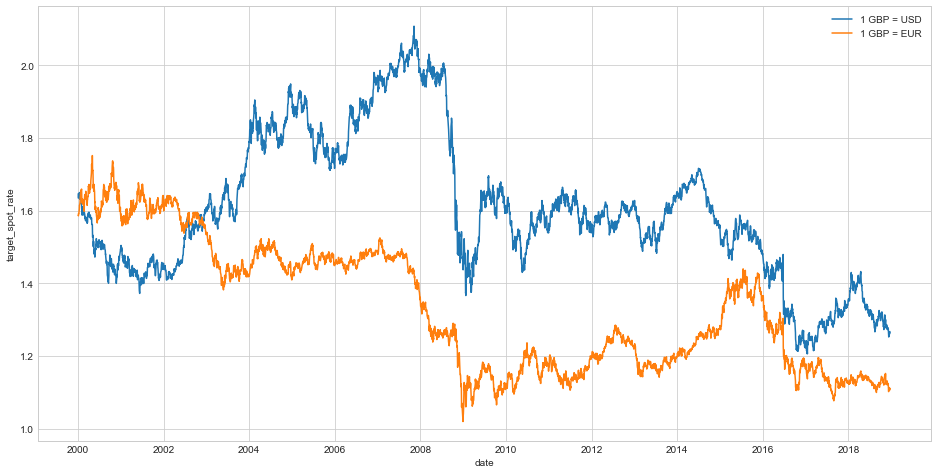

In [378]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(16,8))
plt.style.use('seaborn-whitegrid')

gbp_usd = gbp_df[gbp_df['target_currency_symbol']=='USD']
gbp_eur = gbp_df[gbp_df['target_currency_symbol']=='EUR']

ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_usd, label='1 GBP = USD')
ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_eur, label='1 GBP = EUR')

plt.show()

In [379]:
# %%timeit
# def change_from_n_days_ago(df, target_currency_symbol, current_date, current_rate, n):

#     df = df[df['target_currency_symbol']==target_currency_symbol]

#     try:
#         previous_period_rate = df[df.date < current_date - pd.to_timedelta(n, 'D')].sort_values('date', ascending=False).iloc[0]['target_spot_rate']
#         change = current_rate - previous_period_rate
#     except:
#         change = None

#     return change

# temp = gbp_df.head(10)
# temp['test'] = temp.apply(lambda x: change_from_n_days_ago(temp, x['target_currency_symbol'], x['date'], x['target_spot_rate'], 1), axis=1)
# temp.sort_values(['target_currency_symbol', 'date'], ascending=False)

In [380]:
gbp_df.shape

(122968, 10)

In [381]:
gbp_pivot_df = gbp_df.pivot(index='date', columns='target_currency_symbol', values='target_spot_rate')

In [382]:
gbp_pivot_d_change = gbp_pivot_df/gbp_pivot_df.shift(1, freq=pd.to_timedelta(1, 'D')) - 1
gbp_pivot_d_change = gbp_pivot_d_change.unstack().reset_index().rename({0: '1d_return'}, axis=1)

gbp_pivot_w_change = gbp_pivot_df/gbp_pivot_df.shift(7, freq=pd.to_timedelta(1, 'D')) - 1
gbp_pivot_w_change = gbp_pivot_w_change.unstack().reset_index().rename({0: '1w_return'}, axis=1)

gbp_pivot_m_change = gbp_pivot_df/gbp_pivot_df.shift(30, freq=pd.to_timedelta(1, 'D')) - 1
gbp_pivot_m_change = gbp_pivot_m_change.unstack().reset_index().rename({0: '1m_return'}, axis=1)

gbp_pivot_y_change = gbp_pivot_df/gbp_pivot_df.shift(365, freq=pd.to_timedelta(1, 'D')) - 1
gbp_pivot_y_change = gbp_pivot_y_change.unstack().reset_index().rename({0: '1y_return'}, axis=1)

In [383]:
gbp_df = gbp_df.merge(gbp_pivot_d_change, how='left', on=['date', 'target_currency_symbol'])
gbp_df = gbp_df.merge(gbp_pivot_w_change, how='left', on=['date', 'target_currency_symbol'])
gbp_df = gbp_df.merge(gbp_pivot_m_change, how='left', on=['date', 'target_currency_symbol'])
gbp_df = gbp_df.merge(gbp_pivot_y_change, how='left', on=['date', 'target_currency_symbol'])
gbp_df = gbp_df[~gbp_df['base_currency'].isnull()]
gbp_df.head()

,date,day,month,week,year,base_currency,target_currency,target_currency_symbol,base_value,target_spot_rate,1d_return,1w_return,1m_return,1y_return
0,2016-08-12,12,8,32,2016,GBP,Japanese Yen,JPY,1.0,130.5530,-0.006426,-0.018635,-0.052905,-0.326740
1,2016-08-12,12,8,32,2016,GBP,Malaysian ringgit,MYR,1.0,5.2109,0.003602,-0.009240,-0.007504,-0.166256
2,2016-08-12,12,8,32,2016,GBP,New Zealand Dollar,NZD,1.0,1.7886,0.001624,-0.024010,-0.012805,-0.247222
3,2016-08-12,12,8,32,2016,GBP,Norwegian Krone,NOK,1.0,10.6189,-0.004920,-0.043962,-0.045475,-0.170586
4,2016-08-12,12,8,32,2016,GBP,Polish Zloty,PLN,1.0,4.9372,-0.000971,-0.022027,-0.059187,-0.156005


In [384]:
week_vol = gbp_df.groupby(['week', 'month', 'year', 'target_currency_symbol'])['target_spot_rate'].std()
week_vol = week_vol.reset_index().rename({'target_spot_rate': '1w_vol'}, axis=1)

month_vol = gbp_df.groupby(['month', 'year', 'target_currency_symbol'])['target_spot_rate'].std()
month_vol = month_vol.reset_index().rename({'target_spot_rate': '1m_vol'}, axis=1)

year_vol = gbp_df.groupby(['year', 'target_currency_symbol'])['target_spot_rate'].std()
year_vol = year_vol.reset_index().rename({'target_spot_rate': '1y_vol'}, axis=1)

week_vol.head()
month_vol.head()
year_vol.head()

,year,target_currency_symbol,1y_vol
0,2000,ATS,0.504681
1,2000,AUD,0.079927
2,2000,BEF,1.479057
3,2000,CAD,0.069270
4,2000,CHF,0.063835


In [385]:
gbp_df = gbp_df.merge(week_vol, how='left', on=['week', 'month', 'year', 'target_currency_symbol'])
gbp_df = gbp_df.merge(month_vol, how='left', on=['month', 'year', 'target_currency_symbol'])
gbp_df = gbp_df.merge(year_vol, how='left', on=['year', 'target_currency_symbol'])

gbp_df.head()

,date,day,month,week,year,base_currency,target_currency,target_currency_symbol,base_value,target_spot_rate,1d_return,1w_return,1m_return,1y_return,1w_vol,1m_vol,1y_vol
0,2016-08-12,12,8,32,2016,GBP,Japanese Yen,JPY,1.0,130.5530,-0.006426,-0.018635,-0.052905,-0.326740,1.164181,1.655313,14.073918
1,2016-08-12,12,8,32,2016,GBP,Malaysian ringgit,MYR,1.0,5.2109,0.003602,-0.009240,-0.007504,-0.166256,0.030534,0.065165,0.332277
2,2016-08-12,12,8,32,2016,GBP,New Zealand Dollar,NZD,1.0,1.7886,0.001624,-0.024010,-0.012805,-0.247222,0.017184,0.019976,0.178095
3,2016-08-12,12,8,32,2016,GBP,Norwegian Krone,NOK,1.0,10.6189,-0.004920,-0.043962,-0.045475,-0.170586,0.186489,0.198564,0.806359
4,2016-08-12,12,8,32,2016,GBP,Polish Zloty,PLN,1.0,4.9372,-0.000971,-0.022027,-0.059187,-0.156005,0.034950,0.075571,0.314515


In [402]:
import numpy as np
temp = gbp_df[gbp_df['target_currency_symbol']=='USD'].sort_values('date', ascending=False)
temp.date = temp.date.values.astype(np.int64)
temp.dropna(inplace=True)

temp

# vol = ['1w_vol', '1m_vol', '1y_vol']

# X = temp[['target_spot_rate', 'date', '1w_return', '1m_return', '1y_return']]
# y = temp['1d_return']

X = temp[['target_spot_rate', 'date', '1w_return', '1m_return', '1y_return'] + vol]
y = temp['1d_return']

# X = temp[['target_spot_rate', 'date', '1d_return', '1m_return', '1y_return']]
# y = temp['1w_return']

# X = temp[['target_spot_rate', 'date', '1d_return', '1m_return', '1y_return'] + vol]
# y = temp['1w_return']

# X = temp[['target_spot_rate', 'date', '1d_return', '1w_return', '1y_return']]
# y = temp['1m_return']

# X = temp[['target_spot_rate', 'date', '1d_return', '1w_return', '1y_return'] + vol]
# y = temp['1m_return']

# X = temp[['target_spot_rate', 'date', '1d_return', '1w_return', '1m_return']]
# y = temp['1y_return']

# X = temp[['target_spot_rate', 'date', '1d_return', '1w_return', '1m_return'] + vol]
# y = temp['1y_return']

import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              1m_return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Fri, 28 Dec 2018   Prob (F-statistic):                nan
Time:                        14:12:03   Log-Likelihood:                 5693.0
No. Observations:                2584   AIC:                        -1.138e+04
Df Residuals:                    2583   BIC:                        -1.138e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
target_spot_rate -7.128e-40   5.39e-40     -1.324      0.186   -1.77e-39    3.43e-40
date             -5.466e-22   4.13e-22     -1.324      0.186   -1.36e-21    2.63e-22
1d_return        -4.075e-44   3.08e-44     -1.324      0.186   -1.01e-43    1.96e-44
1w_return        -7.539e-45    5.7e-45     -1.324      0.186   -1.87e-44    3.63e-45
1y_return        -1.204e-42   9.09e-43     -1.324      0.186   -2.99e-42     5.8e-43
1w_vol           -3.459e-42   2.61e-42     -1.324      0.186   -8.58e-42    1.67e-42
1m_vol            -6.89e-42   5.21e-42     -1.324      0.186   -1.71e-41    3.32e-42
1y_vol           -2.496e-41   1.89e-41     -1.324      0.186   -6.19e-41     1.2e-41
==============================================================================
Omnibus:                      346.591   Durbin-Watson:                   0.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1076.468
Skew:                          -0.686   Prob(JB):                    1.77e-234
Kurtosis:                       5.849   Cond. No.                     3.03e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+20. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [462]:
# X = temp[['target_spot_rate', 'date', '1w_return', '1m_return', '1y_return']]
# y = temp['1d_return']

# X = temp[['target_spot_rate', 'date', '1w_return', '1m_return', '1y_return'] + vol]
# y = temp['1d_return']

# X = temp[['target_spot_rate', 'date', '1d_return', '1m_return', '1y_return']]
# y = temp['1w_return']

X = temp[['target_spot_rate', 'date', '1d_return', '1m_return', '1y_return'] + vol]
y = temp['1w_return']

# X = temp[['target_spot_rate', 'date', '1d_return', '1w_return', '1y_return']]
# y = temp['1m_return']

# X = temp[['target_spot_rate', 'date', '1d_return', '1w_return', '1y_return'] + vol]
# y = temp['1m_return']

# X = temp[['target_spot_rate', 'date', '1d_return', '1w_return', '1m_return']]
# y = temp['1y_return']

# X = temp[['target_spot_rate', 'date', '1d_return', '1w_return', '1m_return'] + vol]
# y = temp['1y_return']

In [410]:
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [418]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline

lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=1000

X = temp[['target_spot_rate', 'date', '1w_return', '1m_return', '1y_return'] + vol]
y = temp['1d_return']

X = temp[['target_spot_rate', 'date', '1d_return', '1m_return', '1y_return'] + vol]
y = temp['1w_return']

X = temp[['target_spot_rate', 'date', '1d_return', '1w_return', '1y_return'] + vol]
y = temp['1m_return']

X = temp[['target_spot_rate', 'date', '1d_return', '1w_return', '1m_return'] + vol]
y = temp['1y_return']

# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 6

# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
normalize=True,cv=5))
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test,y_test)
    print(degree, RMSE, test_score)

2 1.5525209354054346 0.5642982720034031
3 1.4242604629115572 0.6333149625617572
4 1.357471054039146 0.6668993292163643
5 1.3612302838350367 0.6650518705651618
6 1.3140724724683381 0.687857440477929


In [439]:
model.get_params()['lassocv'].alpha_
model.get_params()['lassocv'].coef_
# len(model.get_params()['lassocv'].coef_)
model.get_params()['polynomialfeatures'].powers_
# model.get_params()['polynomialfeatures'].powers_.shape

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 4],
       [0, 0, 0, ..., 0, 1, 5],
       [0, 0, 0, ..., 0, 0, 6]])

In [517]:
# Try other currencies

# cols=['Japanese Yen','Malaysian ringgit','New Zealand Dollar','Norwegian Krone','Russian Ruble','Saudi Riyal','Singapore Dollar','South African Rand','South Korean Won','Swedish Krona','Taiwan Dollar','Thai Baht','Turkish Lira','US Dollar','Australian Dollar','Canadian Dollar','Chinese Yuan','Euro','Hong Kong Dollar','Indian Rupee','Finnish Markka']
cols=['Japanese Yen','US Dollar','Euro','Hong Kong Dollar']
vals=['target_spot_rate','1d_return','1w_return','1m_return','1y_return','1w_vol','1m_vol','1y_vol']

test_df = gbp_df[gbp_df['target_currency'].isin(cols)]
test_df = test_df.pivot(index='date', columns='target_currency', values=vals)

test_df.dropna(inplace=True)

y_currency = 'US Dollar'
y_value = '1w_return'
y_string = y_value + '_' + y_currency

test_df.columns = test_df.columns.map('_'.join)
X = test_df.drop(y_string, axis=1)
y = test_df[y_string]


In [519]:
# X
# y

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline

lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=1000

# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 5

# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
normalize=True,cv=5))
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test,y_test)
    print(degree, RMSE, test_score)

2 0.031004520109255487 0.9904539957191308


In [ ]:
# gold prices